# Process the file using ``process_goniodata``
Here, we show how to process the output file from the Goniospectrometer setup.

***Input***

The function ``process_goniodata`` requires just one mandatory argument:
- ``file``: the name of the file that wants to be processed (as a full/relative path).

It has several also several optional arguments that can be used to improve the quality of the data:
   
- ``angle_offset`` (str or float/int): Whether to substract and offset to the angle data or not. If a ``'auto'`` is passed, the offset is automatically derived form the symmetry axis between the left and right hemisphere of the angle resolved data, if a float or integer is passed, that value is consider to be the offset to be substracted. The default is ``0.0``.
- ``current`` (float or int): The current used to drive the device in A. Only used to calculate the efficacies (CE and EQE). The default is ``None`` (so the CE adn EQE are not defined).

- ``plot`` (boolean): Whether to plot or not a mini-report of the processed file. The default is ``False``.
        
- ``path_IRF`` (str or path): Path to the file containing the Instrument Response Function to correct the spectra. Should contain two columns, one with the wl and one with the counts. The wavelength vector should match the one correspinding to the experimental data. The default is defined with the ``path_IRF`` variable when loading the module.
        
- ``path_eye_response`` (str or path): Path to the file containing the Eye Response Function to correct the spectra. Should contain two columns, one with the wl and one with the counts. The program interpolates the vector to the correct values.
        
- ``correct_time_drift`` (boolean): If set to ``True``, the radiant intensity will be corrected for the temporal drift between the first measurement and the last one, based on a linear interpolation using the 3 values taken at 0°. The default is ``False``.

In the example below the file ``2020-07-03T13h22m39s_K05D1_example.dat`` is processed, the driving current was 1 mA, the angle offset is set to be automatically corrected. If you suspect that there is  time drift between the first zero-angle measurement and the last one, you can set the ``correct_time_drift`` to ``True`` and check out the result.

***Output***

If ``plot`` is set to ``True``, it generates some report figures that you can save manually.

The function generates two files:
- *.integrated : A file with the integrated over wl data, a row for each viewing angle
- *.sri: A file with the angular spectral radiant intensity (a column for each viewing angle)

Moreoever, the function returns the following variables:
- ``iTime``: initial timestamp as ``np.datetime64``
- ``IntTime``, ``Nscans``: integration time (ms)  and number of averaged scans (#) as ``int`` scalars
- ``L0``, ``CE``, ``EQE``: forward luminance, CE and EQE as ``float`` scalars
- ``Angles``: viewing angles as 1D vector ``np.array``
- ``Wavelengths``: wavelengths angles as 1D vector ``np.array``
- ``SpecRadInt``: Spectral Radiant Intensity as matrix ``np.array``
- ``SpecLumInt``: Spectral Luminous Intensity as matrix ``np.array``
- ``LumInt``: luminous intensity as 1D vector ``np.array``
- ``LumIntNorm``: norm. luminous intensity as 1D vector ``np.array``
- ``Luminance``: luminance as 1D vector ``np.array``
- ``LuminanceNorm``: normalized luminance as 1D vector ``np.array``


In [3]:
# Load the function to process the data
from pyGonioSpectrometer.data_processing import process_goniodata

INFO: Automatic angle offset correction applied. Offset = -1.01°
# IRF_file: C:\Users\JOANRR\Documents\Python Scripts\pyGonioSpectrometer\data_processing\calibration_files\IRF_FlameBlueFiber_wLens2945K.txt
# correct_time_drift: False
# ABS_CALFACTOR: 7.10e+06
# angle_offset = -1.01°
# I = 1.00 mA
# L0 =  1048.57 cd m-2
# EQE =  1.54 %
# CE =  4.19 cd A-1
# Lambertian Corr. Factor =  1.0614
2020-07-03T13:22:39.271158# Zero timestamp



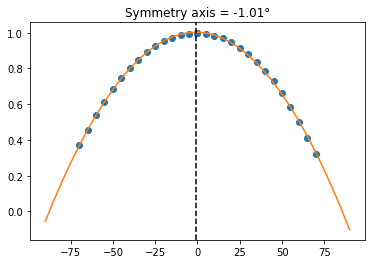

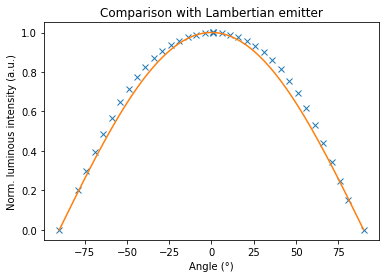

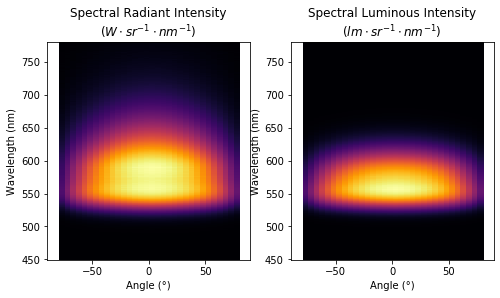

In [4]:
file = '2020-07-03T13h22m39s_K05D1_example.dat'
output = process_goniodata(file, current = 0.001,\
                               angle_offset= 'auto',\
                               plot = True)